# Proyecto 1

## Integrantes

* Maria Paula Gonzalez Escallon 
* Jessica Alejandra Robles Moreno
* Juan Esteban Vergara Ascencio

## Importar

In [31]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier

#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

# Importar/ Exportar modelos
from joblib import dump, load

## Carga de Datos

In [2]:
df_info=pd.read_csv('SuicidiosProyecto.csv', sep=',', decimal=',', encoding = 'utf-8', index_col=0)

In [3]:
df_info.shape

(195700, 2)

In [4]:
df_info.head()

,text,class
Unnamed: 0,,
173271,i want to destroy myselffor once everything wa...,suicide
336321,I kinda got behind schedule with learning for ...,non-suicide
256637,I'm just not sure anymoreFirst and foremost: I...,suicide
303772,please give me a reason to liveThats too much ...,suicide
293747,27f struggling to find meaning moving forwardI...,suicide


In [5]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195700 entries, 173271 to 305170
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    195700 non-null  object
 1   class   195700 non-null  object
dtypes: object(2)
memory usage: 4.5+ MB


In [6]:
df_info["class"].value_counts()

non-suicide    110165
suicide         85535
Name: class, dtype: int64

## Limpieza de datos

In [7]:
df_copia=df_info.copy()

In [8]:
def remove_punctuation(words):
    
    a_string = words
    new_words  = a_string.replace('.', '')
    new_words = new_words.replace(':','')
    new_words = new_words.replace(',','')
    new_words = new_words.replace(';','')
    new_words = new_words.replace("'",'')
    #new_words = new_words.replace('filler','')
    new_words = new_words.lower()
    return new_words


def preprocessing(words):
    words = remove_punctuation(words)
    return words

In [9]:
import string
punctuation = set(string.punctuation)
def tokenize(sentence):
    tokens = []
    for token in sentence.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens

def tokenizer():
  

In [11]:
df_copia.head()

,text,class
Unnamed: 0,,
173271,i want to destroy myselffor once everything wa...,suicide
336321,i kinda got behind schedule with learning for ...,non-suicide
256637,im just not sure anymorefirst and foremost im ...,suicide
303772,please give me a reason to livethats too much ...,suicide
293747,27f struggling to find meaning moving forwardi...,suicide


## Sin limpieza

In [ ]:
train_text, test_text, train_labels, test_labels = train_test_split(df_info["text"], df_info["class"], stratify=df_info["class"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 146775, testing examples 48925


In [ ]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

### LinearSVC

In [ ]:
classifier = LinearSVC()
classifier = classifier.fit(train_X, train_labels)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

/Users/mau/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
predicciones_train = classifier.predict(train_X)
accuracy = accuracy_score(train_labels, predicciones_train)
print(f"Train accuracy: {accuracy:.4%}")

Train accuracy: 99.7200%


In [ ]:
predicciones_test = classifier.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones_test)
print(f"Test accuracy: {accuracy:.4%}")

Test accuracy: 93.4410%


In [ ]:
# Se genera la matriz de confusión
confusion_matrix(test_labels, predicciones_test)

array([[26589,   952],
       [ 2257, 19127]])

/Users/mau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


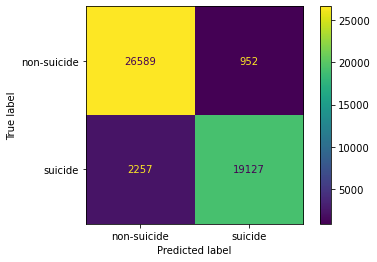

In [ ]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(classifier, test_X, test_labels)  
plt.show()

In [ ]:
# Mostrar reporte de clasificación
print(classification_report(test_labels, predicciones_test))
print('Exactitud: %.4f' % accuracy_score(test_labels, predicciones_test))

              precision    recall  f1-score   support

 non-suicide       0.92      0.97      0.94     27541
     suicide       0.95      0.89      0.92     21384

    accuracy                           0.93     48925
   macro avg       0.94      0.93      0.93     48925
weighted avg       0.94      0.93      0.93     48925

Exactitud: 0.9344


### Naive Bayers

#### Con Pipeline

In [ ]:
# Model building
model = make_pipeline(TfidfVectorizer(tokenizer = tokenize, binary=True), MultinomialNB())
# Training the model with the training data
model.fit(train_text, train_labels)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(binary=True,
                                 tokenizer=<function tokenize at 0x7faf001d8e50>)),
                ('multinomialnb', MultinomialNB())])

In [ ]:
predicciones_train = model.predict(train_text)
accuracy = accuracy_score(train_labels, predicciones_train)
print(f"Train accuracy: {accuracy:.4%}")

Train accuracy: 92.2507%


In [ ]:
predicciones_test = model.predict(test_text)
accuracy = accuracy_score(test_labels, predicciones_test)
print(f"Test accuracy: {accuracy:.4%}")

Test accuracy: 90.7675%


#### Sin Pipeline

In [ ]:
classifier2 = MultinomialNB()
classifier2 = classifier2.fit(train_X, train_labels)

In [ ]:
predicciones_train = classifier2.predict(train_X)
accuracy = accuracy_score(train_labels, predicciones_train)
print(f"Train accuracy: {accuracy:.4%}")

Train accuracy: 93.2625%


In [ ]:
predicciones_test = classifier2.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones_test)
print(f"Test accuracy: {accuracy:.4%}")

Test accuracy: 92.3311%


In [ ]:
# Se genera la matriz de confusión
confusion_matrix(test_labels, predicciones_test)

array([[24975,  2566],
       [ 1186, 20198]])

/Users/mau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


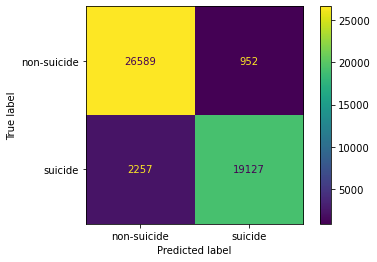

In [ ]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(classifier, test_X, test_labels)  
plt.show()

In [ ]:
# Mostrar reporte de clasificación
print(classification_report(test_labels, predicciones_test))
print('Exactitud: %.4f' % accuracy_score(test_labels, predicciones_test))

              precision    recall  f1-score   support

 non-suicide       0.95      0.91      0.93     27541
     suicide       0.89      0.94      0.92     21384

    accuracy                           0.92     48925
   macro avg       0.92      0.93      0.92     48925
weighted avg       0.93      0.92      0.92     48925

Exactitud: 0.9233


### SDGClassifier

#### Con Pipeline

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(tokenizer = tokenize, binary=True)),('tfidf', TfidfTransformer()),('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)),])

In [ ]:
text_clf.fit(train_text, train_labels)

Pipeline(steps=[('vect',
                 CountVectorizer(binary=True,
                                 tokenizer=<function tokenize at 0x7faf001d8e50>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
predicciones_train = text_clf.predict(train_text)
accuracy = accuracy_score(train_labels, predicciones_train)
print(f"Train accuracy: {accuracy:.4%}")

Train accuracy: 89.4301%


In [ ]:
predicciones_test = text_clf.predict(test_text)
accuracy = accuracy_score(test_labels, predicciones_test)
print(f"Test accuracy: {accuracy:.4%}")

Test accuracy: 90.0991%


#### Sin Pipeline

In [ ]:
classifier3 = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)
classifier3 = classifier3.fit(train_X, train_labels)

In [ ]:
predicciones_train = classifier3.predict(train_X)
accuracy = accuracy_score(train_labels, predicciones_train)
print(f"Train accuracy: {accuracy:.4%}")

Train accuracy: 93.1358%


In [ ]:
predicciones_test = classifier3.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones_test)
print(f"Test accuracy: {accuracy:.4%}")

Test accuracy: 92.5376%


In [ ]:
# Se genera la matriz de confusión
confusion_matrix(test_labels, predicciones_test)

array([[26570,   971],
       [ 2680, 18704]])

/Users/mau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


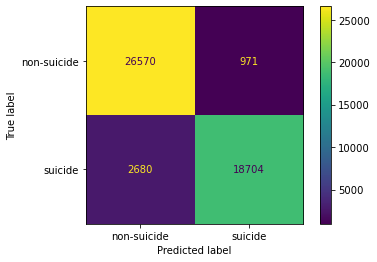

In [ ]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(classifier3, test_X, test_labels)  
plt.show()

In [ ]:
# Mostrar reporte de clasificación
print(classification_report(test_labels, predicciones_test))
print('Exactitud: %.4f' % accuracy_score(test_labels, predicciones_test))

              precision    recall  f1-score   support

 non-suicide       0.91      0.96      0.94     27541
     suicide       0.95      0.87      0.91     21384

    accuracy                           0.93     48925
   macro avg       0.93      0.92      0.92     48925
weighted avg       0.93      0.93      0.92     48925

Exactitud: 0.9254


## Con limpieza

In [52]:
train_text, test_text, train_labels, test_labels = train_test_split(df_copia["text"], df_copia["class"], stratify=df_copia["class"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 146775, testing examples 48925


In [13]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

### LinearSVC

#### Sin Pipeline

In [14]:
classifier = LinearSVC()
classifier = classifier.fit(train_X, train_labels)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [15]:
predicciones_train = classifier.predict(train_X)
accuracy = accuracy_score(train_labels, predicciones_train)
print(f"Train accuracy: {accuracy:.4%}")

Train accuracy: 99.7200%


In [16]:
predicciones_test = classifier.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones_test)
print(f"Test accuracy: {accuracy:.4%}")

Test accuracy: 93.4410%


In [17]:
# Se genera la matriz de confusión
confusion_matrix(test_labels, predicciones_test)

array([[26589,   952],
       [ 2257, 19127]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


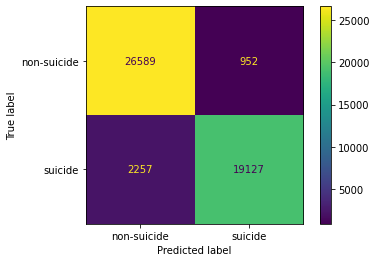

In [18]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(classifier, test_X, test_labels)  
plt.show()

In [19]:
# Mostrar reporte de clasificación
print(classification_report(test_labels, predicciones_test))
print('Exactitud: %.4f' % accuracy_score(test_labels, predicciones_test))

              precision    recall  f1-score   support

 non-suicide       0.92      0.97      0.94     27541
     suicide       0.95      0.89      0.92     21384

    accuracy                           0.93     48925
   macro avg       0.94      0.93      0.93     48925
weighted avg       0.94      0.93      0.93     48925

Exactitud: 0.9344


#### Con Pipeline

In [ ]:
categorical_preprocessing = Pipeline([('Token', tokenize())])
text_preprocessing = Pipeline([('Vect', CountVectorizer())])


In [20]:
classifier = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [57]:
from sklearn.preprocessing import FunctionTransformer
def pipelinize(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

from nltk.tokenize import WhitespaceTokenizer
def w_tokenizer(text):
    
    tokenizer = WhitespaceTokenizer()   
# Use tokenize method 
    tokenized_list = tokenizer.tokenize(text) 
    return(tokenized_list)
from nltk.stem.snowball import SnowballStemmer
def stemmer_snowball(text_list):
    snowball = SnowballStemmer(language='english')
    return_list = []
    for i in range(len(text_list)):
        return_list.append(snowball.stem(text_list[i]))
    return(return_list)

import re
def preprocessor_final(text):
    if isinstance((text), (str)):
        text = re.sub('<[^>]*>', '', text)
        text = re.sub('[\W]+', '', text.lower())
        return text
    if isinstance((text), (list)):
        return_list = []
        for i in range(len(text)):
            temp_text = re.sub('<[^>]*>', '', text[i])
            temp_text = re.sub('[\W]+', '', temp_text.lower())
            return_list.append(temp_text)
        return(return_list)
    else:
        pass

In [34]:

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(tokenize)

In [ ]:
#estimators = [('tokenizer', pipelinize(w_tokenizer)), ('stemmer', pipelinize(stemmer_snowball)), ('preprocessor', pipelinize(preprocessor_final))]
#pipe = Pipeline(estimators)

#pipe.transform(train_text)

In [66]:
model = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', classifier)])

In [67]:
model = model.fit(train_text, train_labels)

In [68]:
predicciones_train = model.predict(train_text)
accuracy = accuracy_score(train_labels, predicciones_train)
print(f"Train accuracy: {accuracy:.4%}")

Train accuracy: 97.6651%


In [69]:
predicciones_test = model.predict(test_text)
accuracy = accuracy_score(test_labels, predicciones_test)
print(f"Test accuracy: {accuracy:.4%}")

Test accuracy: 94.4016%


In [70]:
# Se genera la matriz de confusión
confusion_matrix(test_labels, predicciones_test)

array([[26410,  1131],
       [ 1608, 19776]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


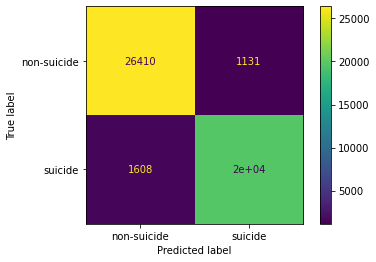

In [71]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(model, test_text, test_labels)  
plt.show()

In [72]:
# Mostrar reporte de clasificación
print(classification_report(test_labels, predicciones_test))
print('Exactitud: %.4f' % accuracy_score(test_labels, predicciones_test))

              precision    recall  f1-score   support

 non-suicide       0.94      0.96      0.95     27541
     suicide       0.95      0.92      0.94     21384

    accuracy                           0.94     48925
   macro avg       0.94      0.94      0.94     48925
weighted avg       0.94      0.94      0.94     48925

Exactitud: 0.9440


#### Exportar el modelo

In [73]:
# Usamos la lbreria joblib
filename = 'modelo.joblib'
# Se guarda
dump(model, filename) 

['modelo.joblib']

### Naive Bayers

#### Con Pipeline

In [ ]:
# Model building
model = make_pipeline(TfidfVectorizer(tokenizer = tokenize, binary=True), MultinomialNB())
# Training the model with the training data
model.fit(train_text, train_labels)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(binary=True,
                                 tokenizer=<function tokenize at 0x7faf001d8e50>)),
                ('multinomialnb', MultinomialNB())])

In [ ]:
predicciones_train = model.predict(train_text)
accuracy = accuracy_score(train_labels, predicciones_train)
print(f"Train accuracy: {accuracy:.4%}")

Train accuracy: 92.2160%


In [ ]:
predicciones_test = model.predict(test_text)
accuracy = accuracy_score(test_labels, predicciones_test)
print(f"Test accuracy: {accuracy:.4%}")

Test accuracy: 90.9351%


#### Sin Pipeline

In [ ]:
classifier2 = MultinomialNB()
classifier2 = classifier2.fit(train_X, train_labels)

In [ ]:
predicciones_train = classifier2.predict(train_X)
accuracy = accuracy_score(train_labels, predicciones_train)
print(f"Train accuracy: {accuracy:.4%}")

Train accuracy: 93.2073%


In [ ]:
predicciones_test = classifier2.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones_test)
print(f"Test accuracy: {accuracy:.4%}")

Test accuracy: 92.4619%


In [ ]:
# Se genera la matriz de confusión
confusion_matrix(test_labels, predicciones_test)

array([[24970,  2571],
       [ 1117, 20267]])

/Users/mau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


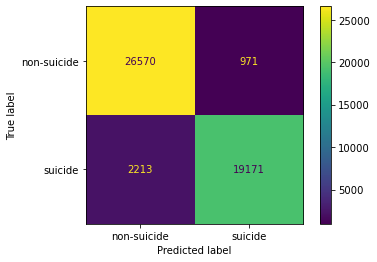

In [ ]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(classifier, test_X, test_labels)  
plt.show()

In [ ]:
# Mostrar reporte de clasificación
print(classification_report(test_labels, predicciones_test))
print('Exactitud: %.4f' % accuracy_score(test_labels, predicciones_test))

              precision    recall  f1-score   support

 non-suicide       0.96      0.91      0.93     27541
     suicide       0.89      0.95      0.92     21384

    accuracy                           0.92     48925
   macro avg       0.92      0.93      0.92     48925
weighted avg       0.93      0.92      0.92     48925

Exactitud: 0.9246


### SDGClassifier

#### Con Pipeline

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(tokenizer = tokenize, binary=True)),('tfidf', TfidfTransformer()),('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)),])

In [ ]:
text_clf.fit(train_text, train_labels)

Pipeline(steps=[('vect',
                 CountVectorizer(binary=True,
                                 tokenizer=<function tokenize at 0x7faf001d8e50>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
predicciones_train = text_clf.predict(train_text)
accuracy = accuracy_score(train_labels, predicciones_train)
print(f"Train accuracy: {accuracy:.4%}")

Train accuracy: 89.3708%


In [ ]:
predicciones_test = text_clf.predict(test_text)
accuracy = accuracy_score(test_labels, predicciones_test)
print(f"Test accuracy: {accuracy:.4%}")

Test accuracy: 90.0623%


#### Sin Pipeline

In [ ]:
classifier3 = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)
classifier3 = classifier3.fit(train_X, train_labels)

In [ ]:
predicciones_train = classifier3.predict(train_X)
accuracy = accuracy_score(train_labels, predicciones_train)
print(f"Train accuracy: {accuracy:.4%}")

Train accuracy: 93.3020%


In [ ]:
predicciones_test = classifier3.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones_test)
print(f"Test accuracy: {accuracy:.4%}")

Test accuracy: 92.8973%


In [ ]:
# Se genera la matriz de confusión
confusion_matrix(test_labels, predicciones_test)

array([[26345,  1196],
       [ 2279, 19105]])

/Users/mau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


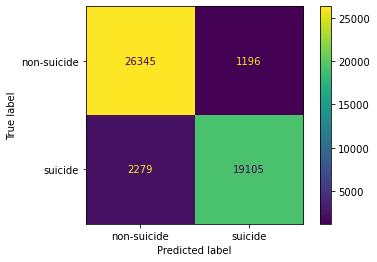

In [ ]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(classifier3, test_X, test_labels)  
plt.show()

In [ ]:
# Mostrar reporte de clasificación
print(classification_report(test_labels, predicciones_test))
print('Exactitud: %.4f' % accuracy_score(test_labels, predicciones_test))

              precision    recall  f1-score   support

 non-suicide       0.92      0.96      0.94     27541
     suicide       0.94      0.89      0.92     21384

    accuracy                           0.93     48925
   macro avg       0.93      0.92      0.93     48925
weighted avg       0.93      0.93      0.93     48925

Exactitud: 0.9290
